## Final Project Submission

Please fill out: 
* Student name: BRIAN OUKO
* Student pace: PART TIME
* Scheduled project review date/time: 
* Instructor name: SAMUEL KARU
* Blog post URL:


## Imports

In [381]:
#imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from statsmodels.formula.api import ols

#### Data loading

Understanding the dataset by first loading the data and viewing the first 5 rows of the dataset

In [382]:
df = pd.read_csv("./data/kc_house_data.csv")
df.head() # To view the first 5 rows

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [383]:
# To know what columns we have in our dataset
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

The dataset contains various features related to house sales. Here's a brief overview of the columns in the dataset:  

id: Unique identifier for each house.  
date: Date the house was sold.  
price: Sale price of the house ($10000s).  
bedrooms: Number of bedrooms.  
bathrooms: Number of bathrooms.  
sqft_living: Square footage of the living area.  
sqft_lot: Square footage of the lot.  
floors: Number of floors.  
waterfront: Whether the house has a waterfront view (1 if yes, 0 if no).  
view: Quality of the view from the house.  
condition: Condition of the house.  
grade: Overall grade given to the house, based on King County grading system.  
sqft_above: Square footage of the house apart from the basement.  
sqft_basement: Square footage of the basement.  
yr_built: Year the house was built.  
yr_renovated: Year the house was renovated (0 if never renovated).  
zipcode: ZIP code of the house.  
lat: Latitude coordinate.  
long: Longitude coordinate.  
sqft_living15: Square footage of the living area in 2015 (sometimes different from sqft_living due to renovations).  
sqft_lot15: Square footage of the lot in 2015 (sometimes different from sqft_lot due to subdivisions).  
To analyze this dataset, we can perform various tasks such as data cleaning, exploratory data analysis (EDA), feature engineering, and model building.

# EDA and Data Cleaning

In [384]:
# To know the number of columns and rows of the Dataset
df.shape

(21597, 21)

In [385]:
# To have an information about the data type and count of null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

### Check for Duplicates

In [386]:
df.duplicated().sum()

0

### Check for Null Values

In [387]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

### Fill the Null Values

In [388]:
# fill null values with mean
df = df.fillna(df.mean())

In [389]:
# Recheck for Null values
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

### Checking for Outliers

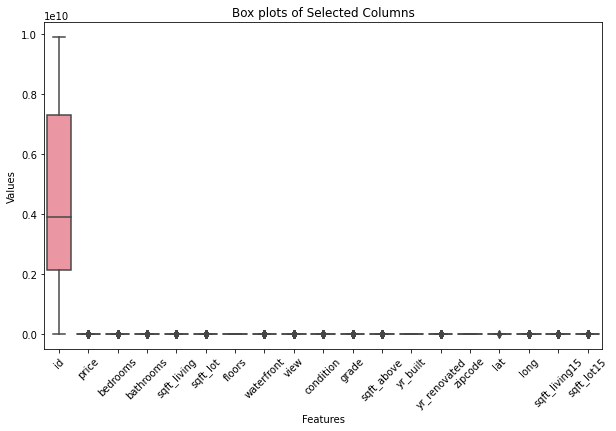

In [390]:
# Plotting box plots for each column
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title('Box plots of Selected Columns')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

### Get the Outliers

In [391]:
# Calculate IQR for selected columns
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = ((df < lower_bound) | (df > upper_bound)).any(axis=1)

# Print indices of outliers
outlier_indices = df.index[outliers]

### Remove the Outliers

In [392]:
# droping all columns with outliers 
df = df.drop(outlier_indices)

In [393]:
df = df.drop(['waterfront', 'view', 'yr_renovated'], axis=1)

## Correlation HeatMap

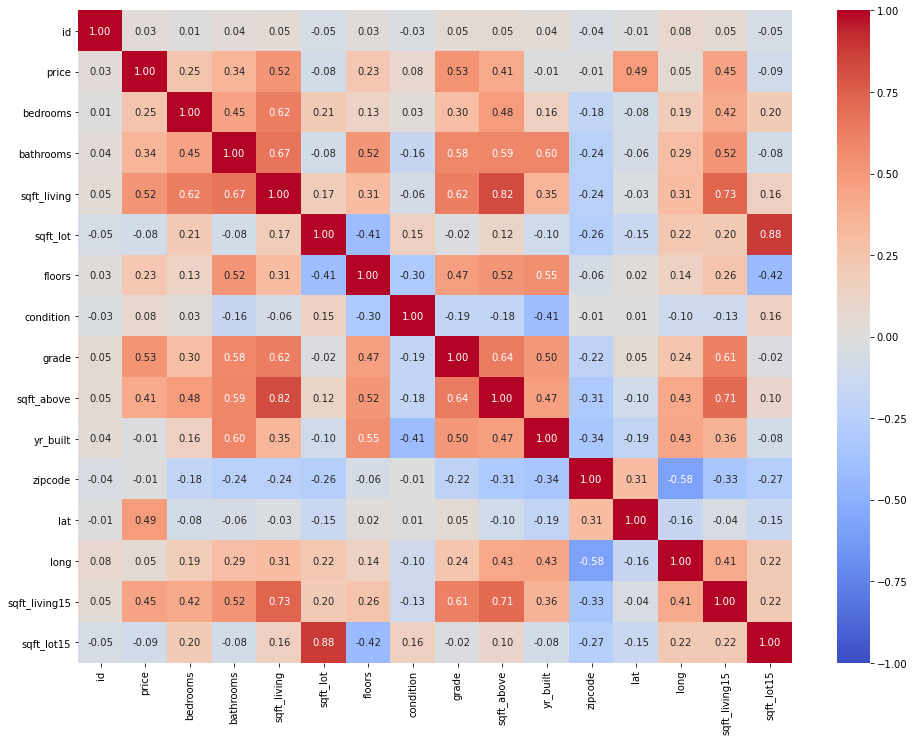

In [394]:
# Set the figure size
plt.figure(figsize=(16, 12))

# Create the heatmap
sns.heatmap(df.corr(), cmap="coolwarm", annot=True, fmt=".2f", vmin=-1, vmax=1)

# Display the plot
plt.show();

## Feature Selection

In [395]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Select features with high correlation with the target variable (price)
target_corr_threshold = 0.3  # You can adjust this threshold based on your criteria
high_corr_features = correlation_matrix.index[abs(correlation_matrix["price"]) > target_corr_threshold].tolist()

# Remove the target variable itself from the list
high_corr_features.remove("price")

# Check for multicollinearity by calculating correlation among the selected features
selected_corr_matrix = correlation_matrix.loc[high_corr_features, high_corr_features]

# Further refine the selected features by removing highly correlated pairs
multicollinearity_threshold = 0.8  # You can adjust this threshold based on your criteria
final_features = high_corr_features.copy()
for feature1 in high_corr_features:
    for feature2 in high_corr_features:
        if feature1 != feature2 and abs(selected_corr_matrix.loc[feature1, feature2]) > multicollinearity_threshold:
            if feature1 in final_features:
                final_features.remove(feature1)
            if feature2 in final_features:
                final_features.remove(feature2)

print("\nFinal selected features after removing multicollinearity:")
print(final_features)


Final selected features after removing multicollinearity:
['bathrooms', 'grade', 'lat', 'sqft_living15']


In [396]:
# Selected features based on high correlation with price and removing multicollinearity
df =df[['sqft_living', 'bathrooms', 'grade', 'price']]

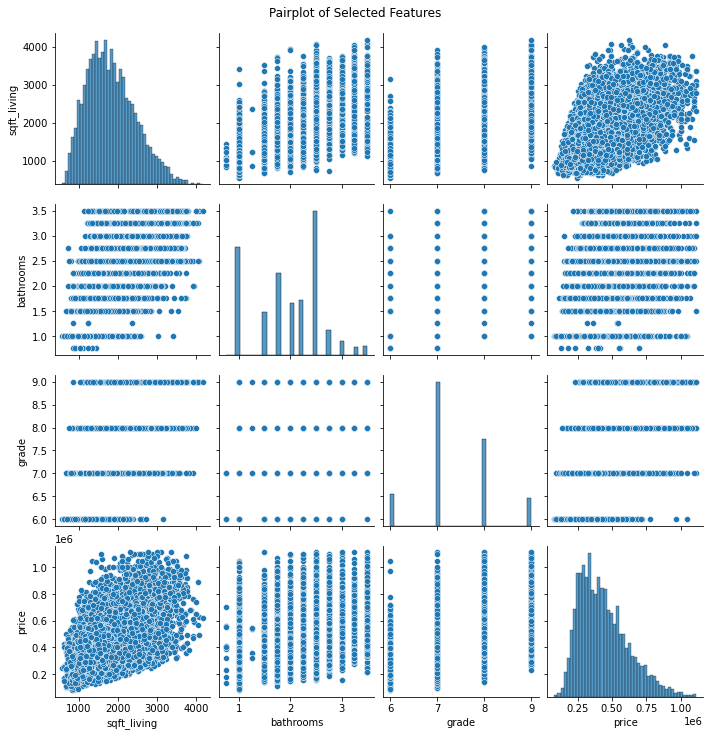

In [397]:
# Create a pairplot
sns.pairplot(df, diag_kind='auto')

# Display the plot
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show();

# Data Analysis

Analysis 1: How does the sqft_living relate to price?

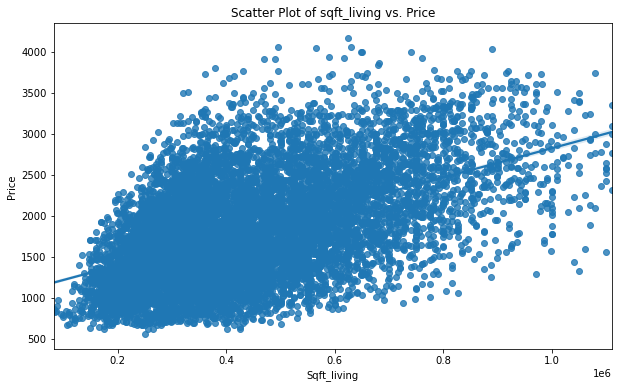

In [402]:
# Scatter plot of bathrooms vs. price
plt.figure(figsize=(10, 6))
sns.regplot(x='price', y='sqft_living', data=df)
plt.title('Scatter Plot of sqft_living vs. Price')
plt.xlabel('Sqft_living')
plt.ylabel('Price')
plt.show();

In [400]:
# Replace None with appropriate code
simple_formula = 'price ~ sqft_living'
simple_model = ols(simple_formula, df).fit()
simple_model_summary = simple_model.summary()

simple_model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.268
Model:                            OLS   Adj. R-squared:                  0.268
Method:                 Least Squares   F-statistic:                     4006.
Date:                Wed, 17 Jul 2024   Prob (F-statistic):               0.00
Time:                        19:56:54   Log-Likelihood:            -1.4644e+05
No. Observations:               10956   AIC:                         2.929e+05
Df Residuals:                   10954   BIC:                         2.929e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.655e+05   4573.096     36.196      0.000    1.57e+05    1.74e+05
sqft_living   150.2123      2.373     63.294      0.000     145.560     154.864
==============================================================================
Omnibus:                      644.571   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              762.003
Skew:                           0.632   Prob(JB):                    3.41e-166
Kurtosis:                       3.265   Cond. No.                     5.97e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.97e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [401]:
# Define the formula for multiple regression
multiple_formula = 'price ~ sqft_living + bathrooms + grade'

# Fit the multiple regression model
multiple_model = ols(multiple_formula, data=df).fit()

# Get the summary of the multiple regression model
multiple_model_summary = multiple_model.summary()

multiple_model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.344
Method:                 Least Squares   F-statistic:                     1912.
Date:                Wed, 17 Jul 2024   Prob (F-statistic):               0.00
Time:                        19:57:05   Log-Likelihood:            -1.4584e+05
No. Observations:               10956   AIC:                         2.917e+05
Df Residuals:                   10952   BIC:                         2.917e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -2.969e+05   1.39e+04    -21.402      0.000   -3.24e+05    -2.7e+05
sqft_living   106.2251      3.276     32.428      0.000      99.804     112.646
bathrooms   -3.181e+04   3034.714    -10.482      0.000   -3.78e+04   -2.59e+04
grade        8.201e+04   2303.631     35.599      0.000    7.75e+04    8.65e+04
==============================================================================
Omnibus:                      643.353   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              769.297
Skew:                           0.610   Prob(JB):                    8.90e-168
Kurtosis:                       3.446   Cond. No.                     1.94e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.94e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""